In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import sqlite3 as sq

# Archive #2

#### Procedure for reading the data

We used SQLite to process the file.

In [61]:
conn = sq.connect('database_a2.sqlite')

#### Procedure for cleaning data

We decided to look at a few major tables and clean them by joining them on IDs from other tables. To keep track of which table needed which other table, we wrote out, then drew out the schema of the tables we wanted to work with:

#### Tables to Import

Player Model
- Player
- Batting Style
- Bowling_Style
- Country

Match Model
- Match
- Team
- Season

Venue Model
- Venue
- City


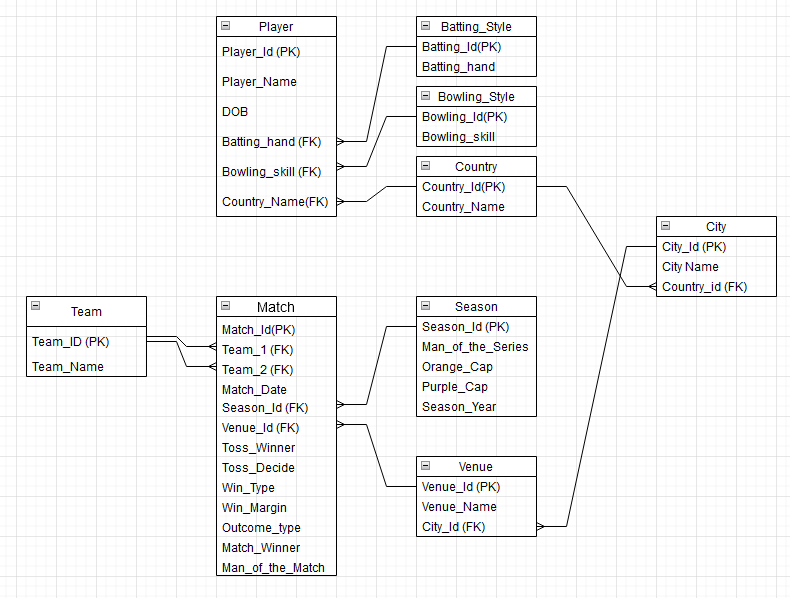

Then, we imported and merged the tables we needed: First, with Player and its related tables...

In [74]:
tables_import = ['Player', 'Batting_Style', 'Bowling_Style', 'Country']
for table in tables_import:
    exec(f'{table} = pd.read_sql_query(f"SELECT * from {table}", sq.connect("database_a2.sqlite"))')
Player = Player.rename(columns={'Country_Name': 'Country_Id', 'Batting_hand': 'Batting_Id', 'Bowling_skill': 'Bowling_Id'})

Run merge and drop cell only once, else run import above again

In [75]:
Player = pd.merge(Player, Country, how="left", left_on="Country_Id", right_on="Country_Id")
Player = pd.merge(Player, Batting_Style, how="left", on=["Batting_Id", "Batting_Id"])
Player = pd.merge(Player, Bowling_Style, how="left", on=["Bowling_Id", "Bowling_Id"])
Player = Player.drop(columns=['Batting_Id', 'Bowling_Id', 'Country_Id'])

In [76]:
Player

,Player_Id,Player_Name,DOB,Country_Name,Batting_hand,Bowling_skill
0,1,SC Ganguly,1972-07-08 00:00:00,India,Left-hand bat,Right-arm medium
1,2,BB McCullum,1981-09-27 00:00:00,New Zealand,Right-hand bat,Right-arm medium
2,3,RT Ponting,1974-12-19 00:00:00,Australia,Right-hand bat,Right-arm medium
3,4,DJ Hussey,1977-07-15 00:00:00,Australia,Right-hand bat,Right-arm offbreak
4,5,Mohammad Hafeez,1980-10-17 00:00:00,Pakistan,Right-hand bat,Right-arm offbreak
...,...,...,...,...,...,...
464,465,DL Chahar,1992-08-07 00:00:00,India,Right-hand bat,Right-arm medium
465,466,P Dharmani,1974-09-27 00:00:00,India,Right-hand bat,NaN
466,467,RV Pawar,1979-09-06 00:00:00,India,Left-hand bat,Slow left-arm orthodox
467,468,KH Devdhar,1989-12-14 00:00:00,India,Right-hand bat,NaN


Then, for Match and its related tables:

In [82]:
tables_import = ['Match', 'Team', 'Season','Venue', 'City']

for table in tables_import:
    exec(f'{table} = pd.read_sql_query(f"SELECT * from {table}", sq.connect("database_a2.sqlite"))')
Match

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,335987,2,1,2008-04-18 00:00:00,1,1,2,1,1,140.0,1,1.0,2.0
1,335988,4,3,2008-04-19 00:00:00,1,2,3,2,1,33.0,1,3.0,19.0
2,335989,6,5,2008-04-19 00:00:00,1,3,5,2,2,9.0,1,6.0,90.0
3,335990,7,2,2008-04-20 00:00:00,1,4,7,2,2,5.0,1,2.0,11.0
4,335991,1,8,2008-04-20 00:00:00,1,5,8,2,2,5.0,1,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,6,2,2016-05-22 00:00:00,9,27,2,1,2,6.0,1,2.0,8.0
573,981018,13,2,2016-05-24 00:00:00,9,1,2,1,2,4.0,1,2.0,110.0
574,981020,11,1,2016-05-25 00:00:00,9,3,1,1,1,22.0,1,11.0,163.0
575,981022,13,11,2016-05-27 00:00:00,9,3,11,1,2,4.0,1,11.0,187.0


In [86]:
matchmerged = pd.merge(Match, Team, left_on='Team_1', right_on='Team_Id', how='left')

matchmerged.rename(columns={'Team_Name': 'Team_1_Name'}, inplace=True)

matchmerged = pd.merge(matchmerged, Team, left_on='Team_2', right_on='Team_Id', how='left')

matchmerged.drop(['Team_Id_x', 'Team_Id_y'], axis=1, inplace=True)

In [87]:
matchmerged

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match,Team_1_Name,Team_Name
0,335987,2,1,2008-04-18 00:00:00,1,1,2,1,1,140.0,1,1.0,2.0,Royal Challengers Bangalore,Kolkata Knight Riders
1,335988,4,3,2008-04-19 00:00:00,1,2,3,2,1,33.0,1,3.0,19.0,Kings XI Punjab,Chennai Super Kings
2,335989,6,5,2008-04-19 00:00:00,1,3,5,2,2,9.0,1,6.0,90.0,Delhi Daredevils,Rajasthan Royals
3,335990,7,2,2008-04-20 00:00:00,1,4,7,2,2,5.0,1,2.0,11.0,Mumbai Indians,Royal Challengers Bangalore
4,335991,1,8,2008-04-20 00:00:00,1,5,8,2,2,5.0,1,1.0,4.0,Kolkata Knight Riders,Deccan Chargers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,6,2,2016-05-22 00:00:00,9,27,2,1,2,6.0,1,2.0,8.0,Delhi Daredevils,Royal Challengers Bangalore
573,981018,13,2,2016-05-24 00:00:00,9,1,2,1,2,4.0,1,2.0,110.0,Gujarat Lions,Royal Challengers Bangalore
574,981020,11,1,2016-05-25 00:00:00,9,3,1,1,1,22.0,1,11.0,163.0,Sunrisers Hyderabad,Kolkata Knight Riders
575,981022,13,11,2016-05-27 00:00:00,9,3,11,1,2,4.0,1,11.0,187.0,Gujarat Lions,Sunrisers Hyderabad


In [88]:
seasonmerge = pd.merge(matchmerged, Season, on='Season_Id', how = 'left')

In [89]:
seasonmerge

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match,Team_1_Name,Team_Name,Man_of_the_Series,Orange_Cap,Purple_Cap,Season_Year
0,335987,2,1,2008-04-18 00:00:00,1,1,2,1,1,140.0,1,1.0,2.0,Royal Challengers Bangalore,Kolkata Knight Riders,32,100,102,2008
1,335988,4,3,2008-04-19 00:00:00,1,2,3,2,1,33.0,1,3.0,19.0,Kings XI Punjab,Chennai Super Kings,32,100,102,2008
2,335989,6,5,2008-04-19 00:00:00,1,3,5,2,2,9.0,1,6.0,90.0,Delhi Daredevils,Rajasthan Royals,32,100,102,2008
3,335990,7,2,2008-04-20 00:00:00,1,4,7,2,2,5.0,1,2.0,11.0,Mumbai Indians,Royal Challengers Bangalore,32,100,102,2008
4,335991,1,8,2008-04-20 00:00:00,1,5,8,2,2,5.0,1,1.0,4.0,Kolkata Knight Riders,Deccan Chargers,32,100,102,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,6,2,2016-05-22 00:00:00,9,27,2,1,2,6.0,1,2.0,8.0,Delhi Daredevils,Royal Challengers Bangalore,8,8,299,2016
573,981018,13,2,2016-05-24 00:00:00,9,1,2,1,2,4.0,1,2.0,110.0,Gujarat Lions,Royal Challengers Bangalore,8,8,299,2016
574,981020,11,1,2016-05-25 00:00:00,9,3,1,1,1,22.0,1,11.0,163.0,Sunrisers Hyderabad,Kolkata Knight Riders,8,8,299,2016
575,981022,13,11,2016-05-27 00:00:00,9,3,11,1,2,4.0,1,11.0,187.0,Gujarat Lions,Sunrisers Hyderabad,8,8,299,2016


Then, Venue and its related tables:

Run merge and drop cell only once, else run import above again

In [ ]:
Venue = pd.merge(Venue, City, how="left", on=["City_Id", "City_Id"])
Venue = Venue.rename(columns={'Country_id': 'Country_Id'})
Venue = pd.merge(Venue, Country, how="left", on=["Country_Id", "Country_Id"])
Venue = Venue.drop(columns=['City_Id', 'Country_Id'])

In [70]:
Venue

,Venue_Id,Venue_Name,City_Name,Country_Name
0,1,M Chinnaswamy Stadium,Bangalore,India
1,2,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India
2,3,Feroz Shah Kotla,Delhi,India
3,4,Wankhede Stadium,Mumbai,India
4,5,Eden Gardens,Kolkata,India
5,6,Sawai Mansingh Stadium,Jaipur,India
6,7,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India
7,8,"MA Chidambaram Stadium, Chepauk",Chennai,India
8,9,Dr DY Patil Sports Academy,Mumbai,India
9,10,Newlands,Cape Town,South Africa
